In [49]:
import scipy.spatial.distance as ssd
import numpy as np
import matplotlib.pyplot as plt

# Choosing Contrast as Color Distance

In [55]:
def rescale(input:np.ndarray, lo:int, hi:int, dtype):
	'''
	rescales input (assuming 0-1) to (lo-hi)
	'''
	scaled = input * (hi-lo) + lo
	return scaled.astype(dtype)

def int_vec_to_RGB(input:np.ndarray):
	return [ "#" + ''.join(map('{:02x}'.format,v)).upper() for v in input]

## RGB Rectangular

Let the RGB value of a color be represented as $v \in \Reals^3$ where $v_i \isin [0, 1]$

Choose $n$ number of vectors and iterating them (maximizing the distances) between every pair of vectors until convergence.

In [169]:
def _increase_distance(matrix:np.ndarray):
	n = len(matrix)
	dists  = ssd.pdist(matrix)
	i,j = np.triu_indices(n, k=1)

	output = np.zeros(shape=(n, n))
	output[i,j] = 1/dists

	scalar_mat = output + output.T

	dir_vec = matrix[:,None,:] - matrix[None,:,:]
	push_vec = np.zeros_like(matrix)
	for i in range(n):
		push_vec[i] = np.dot(
			scalar_mat[i,None], 
			dir_vec[i]
		).sum(axis=0)
	
	return matrix - push_vec


In [202]:
def iterate(v0:np.ndarray, thresh:float, imax:int=10):
	delta = 2*thresh
	
	prev = v0
	i = 0
	while delta > thresh:
		curr = _increase_distance(prev)
		curr = np.clip(curr, a_min=0, a_max=1)
		delta = np.linalg.norm(curr-prev)

		print(f'[{i:2d}] {delta:0.4f}')
		i += 1
		prev = curr

		if i > imax: break

	return curr

In [265]:
# two should be trivial, should result in diametrically opposite corners of a cube
nvecs = 5
v0 = np.random.random(size=(nvecs,3))



res = iterate(v0, thresh=0.1, imax=8)
int_vec = rescale(res, 0, 255, np.uint8)
colors = int_vec_to_RGB(int_vec)

[ 0] 2.9060
[ 1] 3.7677
[ 2] 3.8591
[ 3] 3.8730
[ 4] 3.8730
[ 5] 3.8730
[ 6] 3.8730
[ 7] 3.8730
[ 8] 3.8730


(0.0, 1.0)

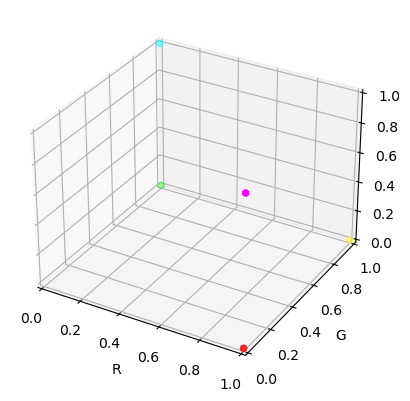

In [266]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter3D(
    *res.T,
    c = colors
)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)


([<matplotlib.patches.Wedge at 0x20e38e35b90>,
 [Text(1.0162674857624154, 0.4209517756015988, '0'),
  Text(0.42095177560159885, 1.0162674857624154, '1'),
  Text(-0.42095177560159874, 1.0162674857624154, '2'),
  Text(-1.0162674857624154, 0.4209517756015989, '3'),
  Text(-1.0162674857624157, -0.4209517756015987, '4'),
  Text(-0.4209517756015994, -1.0162674857624152, '5'),
  Text(0.420951775601599, -1.0162674857624154, '6'),
  Text(1.0162674857624152, -0.42095177560159946, '7')])

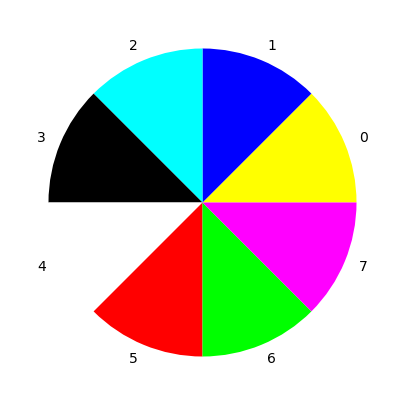

In [259]:
# fig, ax = plt.subplots(figsize=(nvecs,1))
# x = list(range(nvecs))
# y = np.ones_like(x)
# ax.bar(
# 	x,
#     y,
#     color = colors
# )

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(
    np.ones(nvecs),
    colors=colors,
    labels = list(range(nvecs))
)

In [243]:
colors

['#EE87E3', '#88F73C', '#915647', '#720AAF', '#43C5CB', '#7F8D7C', '#D0E4C8']